In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('crop_yield.csv')

In [3]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [5]:
df.shape

(19689, 10)

In [6]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


<AxesSubplot:xlabel='Area', ylabel='Density'>

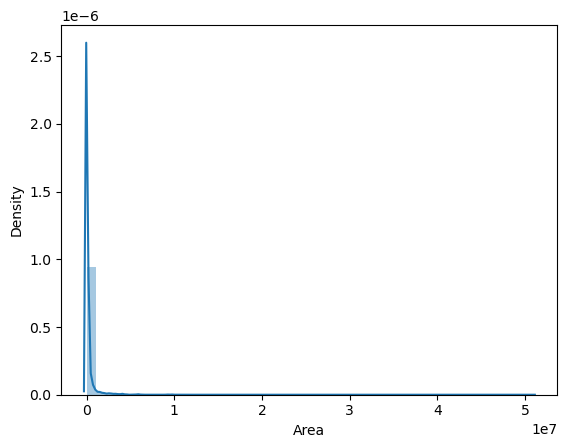

In [128]:
sns.distplot(df['Area'])

<AxesSubplot:xlabel='Area', ylabel='Yield'>

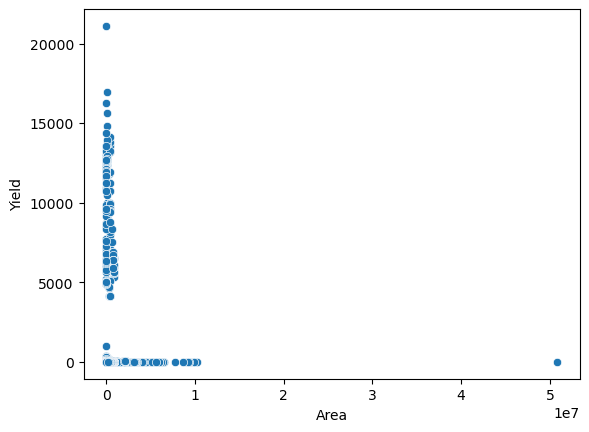

In [129]:
sns.scatterplot(df['Area'],df['Yield'])

<AxesSubplot:xlabel='Pesticide', ylabel='Density'>

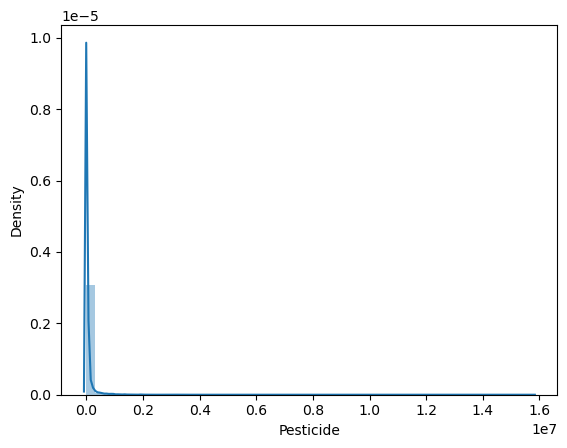

In [130]:
sns.distplot(df['Pesticide'])

<AxesSubplot:xlabel='Pesticide', ylabel='Yield'>

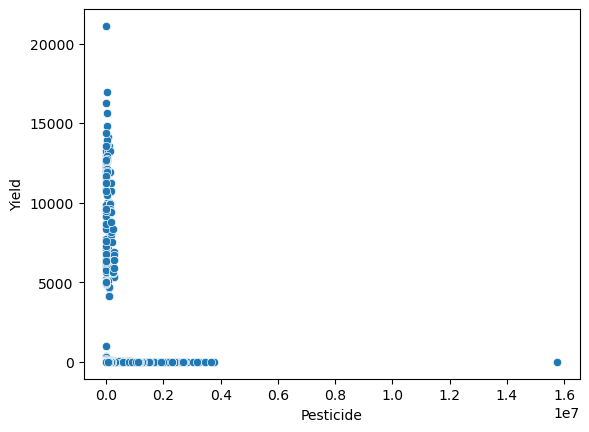

In [131]:
sns.scatterplot(df['Pesticide'],df['Yield'])

<AxesSubplot:xlabel='Fertilizer', ylabel='Density'>

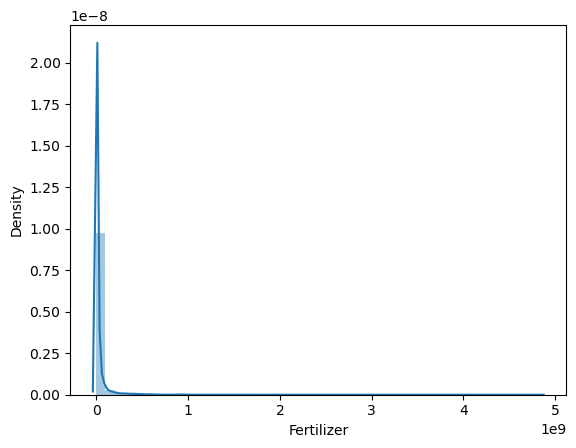

In [132]:
sns.distplot(df['Fertilizer'])

<AxesSubplot:xlabel='Fertilizer', ylabel='Yield'>

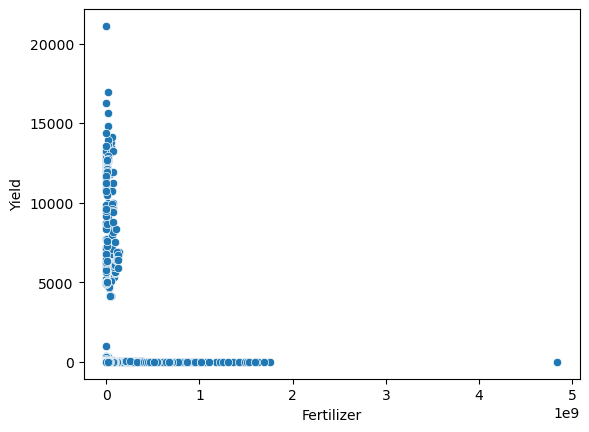

In [133]:
sns.scatterplot(df['Fertilizer'],df['Yield'])

<AxesSubplot:xlabel='Production', ylabel='Density'>

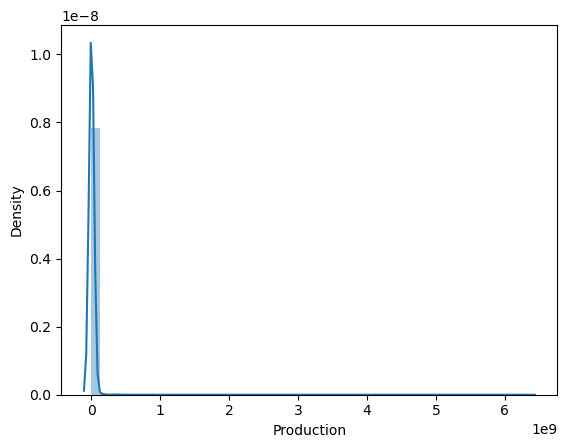

In [134]:
sns.distplot(df['Production'])

<AxesSubplot:xlabel='Production', ylabel='Yield'>

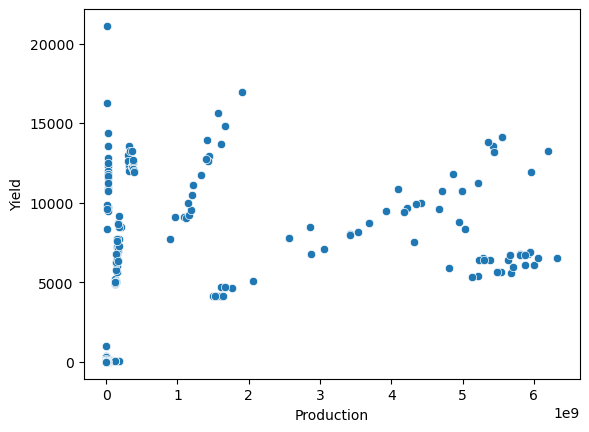

In [135]:
sns.scatterplot(df['Production'],df['Yield'])

In [123]:
Crop_years = df['Crop_Year'].value_counts().index.to_list()

In [127]:
print('The dataset consists of yield of different crops from year {} to year {}'.format(Crop_years[-2],Crop_years[-1]))

The dataset consists of yield of different crops from year 1997 to year 2020


In [10]:
state = df['State'].unique()

In [11]:
year = df['Crop_Year'].unique()

In [95]:
def annual(x):
    if len(x)!=0:
        return x[0]

In [94]:
print('Annaul rainfall in each state each year from 1997 to 2020 is')
annual_rainfall = pd.DataFrame(columns=['State','Crop_Year','Annual_Rainfall'])
for i in state:
    for j in year:
        annual_rainfall=annual_rainfall.append({'State':i,'Crop_Year':j,'Annual_Rainfall':df[(df['State']==i) & (df['Crop_Year']==j)]['Annual_Rainfall'].unique()},ignore_index = True)
annual_rainfall

Annaul rainfall in each state each year from 1997 to 2020 is


,State,Crop_Year,Annual_Rainfall
0,Assam,1997,[2051.4]
1,Assam,1998,[2354.4]
2,Assam,1999,[2201.8]
3,Assam,2000,[1965.5]
4,Assam,2001,[1824.7]
...,...,...,...
715,Sikkim,2016,[2971.6]
716,Sikkim,2017,[2873.6]
717,Sikkim,2018,[3350.1]
718,Sikkim,2019,[2740.0]


In [97]:
annual_rainfall['Annual_Rainfall']=annual_rainfall['Annual_Rainfall'].apply(annual)

<AxesSubplot:xlabel='Crop_Year', ylabel='Annual_Rainfall'>

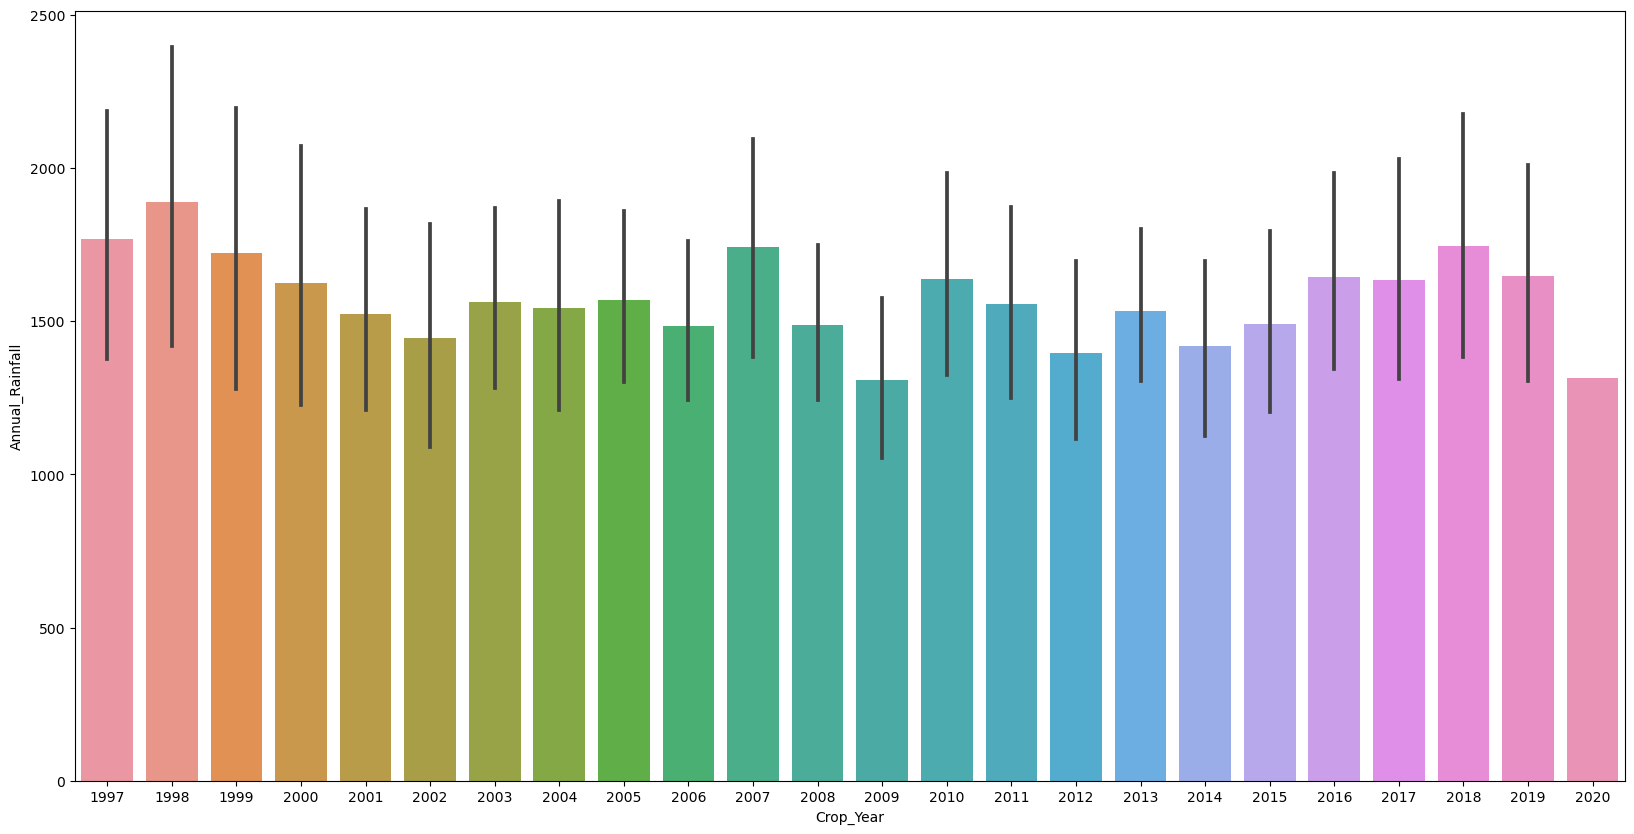

In [105]:
plt.figure(figsize = (20,10))
sns.barplot(annual_rainfall['Crop_Year'],annual_rainfall['Annual_Rainfall'])

<AxesSubplot:xlabel='Annual_Rainfall', ylabel='Count'>

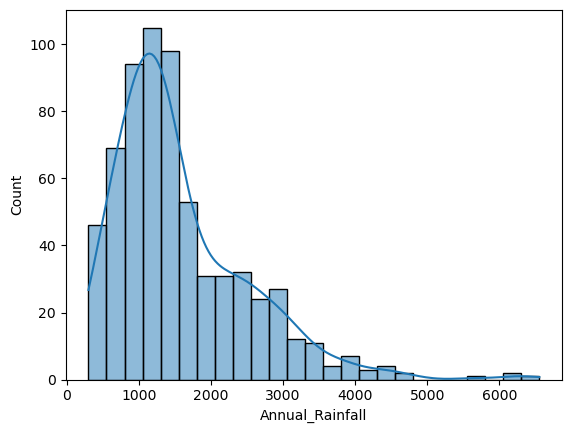

In [113]:
sns.histplot(annual_rainfall['Annual_Rainfall'],kde = True)

<AxesSubplot:xlabel='State', ylabel='Annual_Rainfall'>

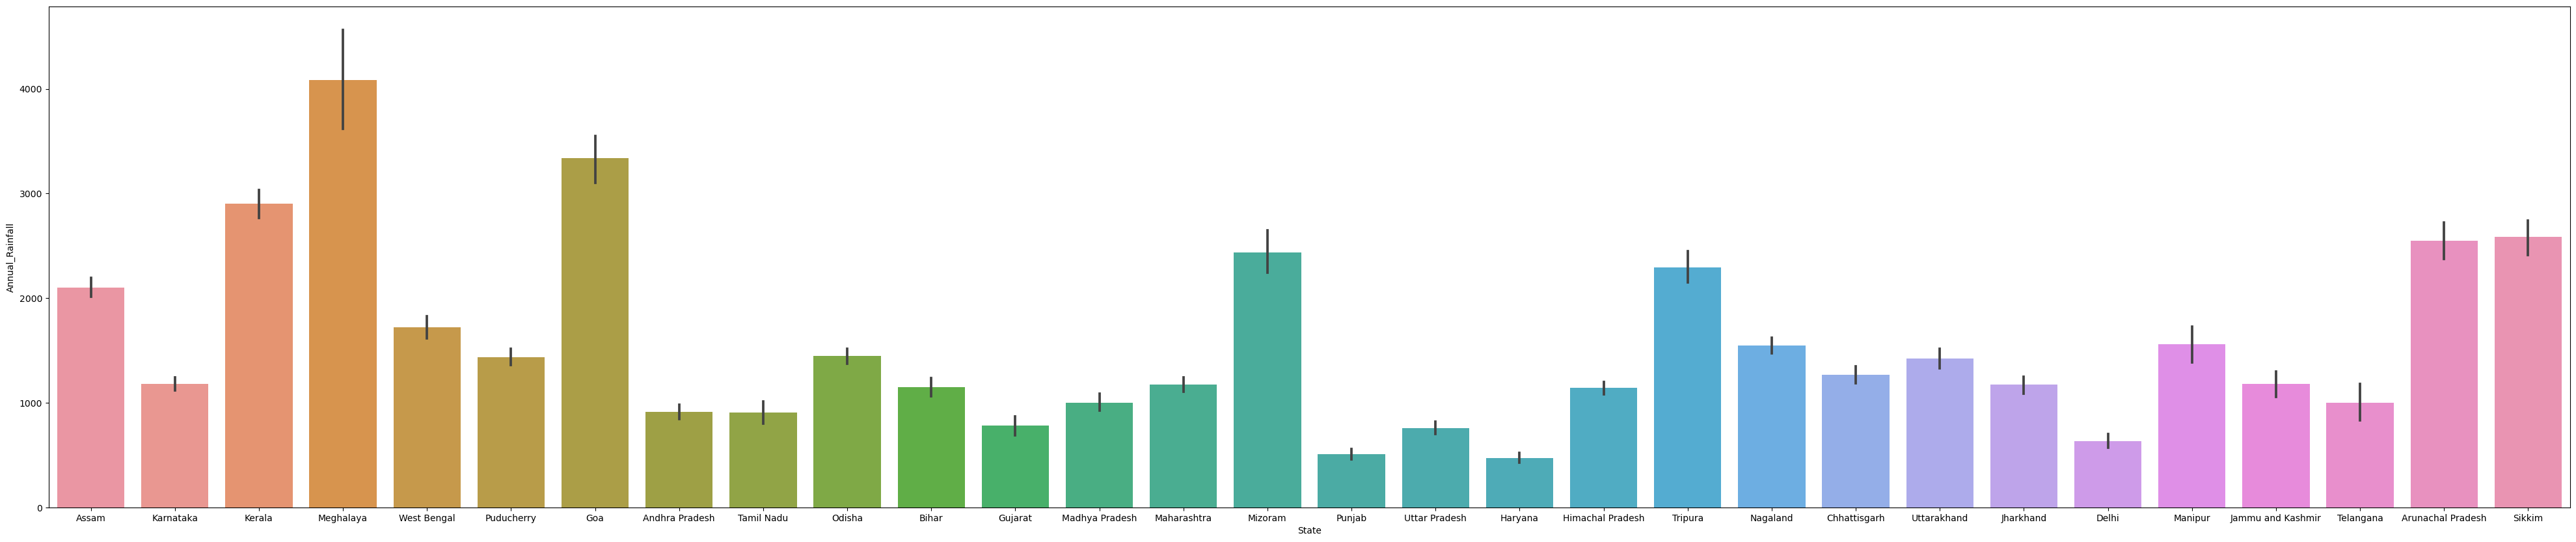

In [118]:
plt.figure(figsize = (50,10))
sns.barplot(annual_rainfall['State'],annual_rainfall['Annual_Rainfall'])

<AxesSubplot:xlabel='Annual_Rainfall', ylabel='Yield'>

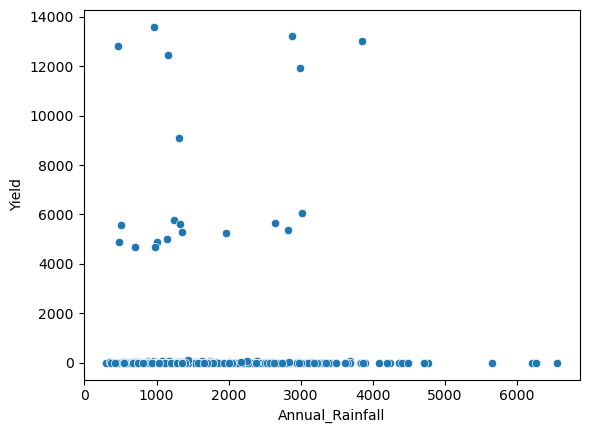

In [119]:
sns.scatterplot(annual_rainfall['Annual_Rainfall'],df['Yield'])

<AxesSubplot:xlabel='Annual_Rainfall', ylabel='Yield'>

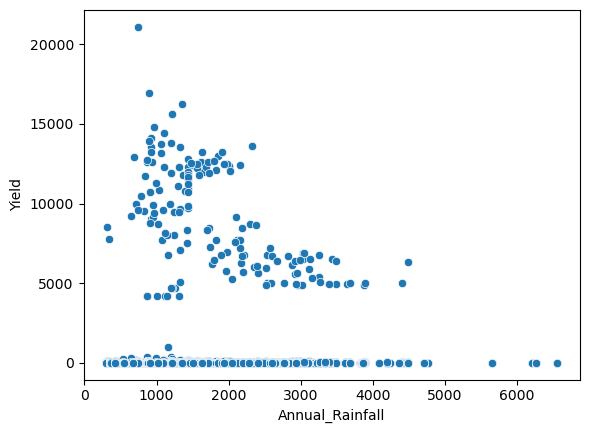

In [120]:
sns.scatterplot(df['Annual_Rainfall'],df['Yield'])

In [15]:
num = df[['Area','Production','Annual_Rainfall','Pesticide','Yield']]

<AxesSubplot:>

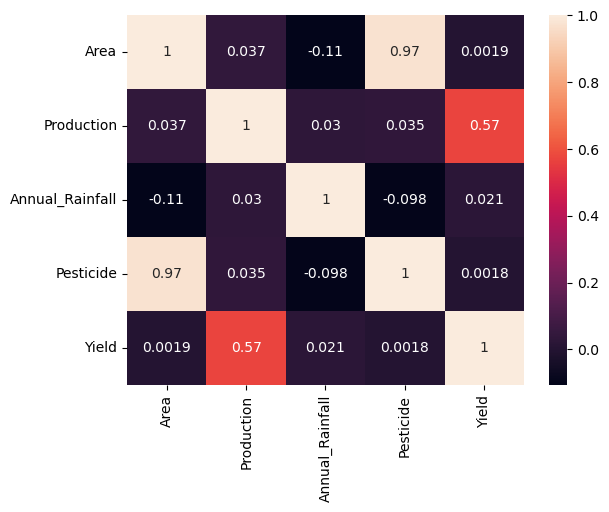

In [16]:
sns.heatmap(num.corr(),annot = True)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.drop('Yield',axis = 1)
y = df['Yield']

In [20]:
x=pd.get_dummies(x)

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.70,random_state =100)

In [22]:
dt = DecisionTreeRegressor(random_state = 100,max_depth = 50)
model_dt_1 = dt.fit(xtrain,ytrain)
yred = model_dt_1.predict(xtest)

In [23]:
print(np.sqrt(mean_squared_error(ytest,yred)))

199.26822117224077


In [24]:
rc = RandomForestRegressor(random_state = 100,max_depth = 50)
model_rc = rc.fit(xtrain,ytrain)
yred = model_rc.predict(xtest)

In [25]:
print(np.sqrt(mean_squared_error(ytest,yred)))

200.38715752871596
